In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Flatten, Dropout, SimpleRNN

In [2]:
!unzip HarryPotter.zip -d HarryPotter
print('-'*20+'\n Upload Completed!!\n'+'-'*20)

Archive:  HarryPotter.zip
  inflating: HarryPotter/harry_potter_reviews.csv  
--------------------
 Upload Completed!!
--------------------


In [3]:
hp= pd.read_csv('/content/HarryPotter/harry_potter_reviews.csv')

In [7]:
#הכרות עם הנתונים
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              491 non-null    int64  
 1   user_sex             491 non-null    object 
 2   user_age             491 non-null    int64  
 3   user_country         491 non-null    object 
 4   rating               491 non-null    float64
 5   comment              491 non-null    object 
 6   favourite_character  491 non-null    object 
 7   date                 491 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 30.8+ KB


In [8]:
hp.head(2)

,user_id,user_sex,user_age,user_country,rating,comment,favourite_character,date
0,0,female,50,Germany,2.5,"""The transitions between scenes were awkward, ...",Severus Snape,2004-12-27
1,1,female,23,Spain,4.0,"""Severus Snape's role adds an intriguing layer.""",Severus Snape,2003-11-22


In [9]:
hp.columns.tolist()

['user_id',
 'user_sex',
 'user_age',
 'user_country',
 'rating',
 'comment',
 'favourite_character',
 'date']

In [4]:
sentences = hp['comment'].tolist()
labels = hp['favourite_character'].tolist()

In [5]:
#OHE
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
labels_encoded = to_categorical(integer_encoded)

In [12]:
type(labels_encoded )

numpy.ndarray

In [13]:
set(integer_encoded) #uniques only

{0, 1, 2, 3, 4, 5, 6, 7}

In [14]:
labels_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(sentences,
                                                    labels_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

In [7]:
#trainig Data
tokenizer = Tokenizer(oov_token = '<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences (train_sequences, padding ='post')

In [19]:
len(train_padded[0])

15

In [23]:
train_padded[1]

array([  2,  69,  70,  21, 112, 217, 218,   2, 163,   0,   0,   0,   0,
         0,   0], dtype=int32)

In [8]:
#testing data
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences (test_sequences, padding ='post',
                             truncating = 'post', maxlen =len(train_padded[0]))

In [32]:
model =Sequential ([
   Embedding(input_dim  =len(word_index)+1,
            output_dim=16),# כמה פרשנויות יש למילה
   SimpleRNN(32),
  Dense(32, activation= 'relu') ,
   Dense(len(labels_encoded[0]), activation = 'softmax')#output layer
])

In [26]:
len(labels_encoded[0])

8

In [33]:
model.compile (loss = 'categorical_crossentropy',
               optimizer = Adam(learning_rate = 0.001),
               metrics = ['accuracy'])

history = model.fit (train_padded,y_train,
                     epochs =10,
                     validation_data = (test_padded,y_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.1176 - loss: 2.0880 - val_accuracy: 0.2222 - val_loss: 2.0451
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2351 - loss: 2.0190 - val_accuracy: 0.4343 - val_loss: 1.9491
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6162 - loss: 1.8279 - val_accuracy: 0.5051 - val_loss: 1.7414
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7328 - loss: 1.4805 - val_accuracy: 0.6061 - val_loss: 1.5324
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8054 - loss: 1.1052 - val_accuracy: 0.6566 - val_loss: 1.3616
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8557 - loss: 0.8281 - val_accuracy: 0.6263 - val_loss: 1.2781
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9020 - loss: 0.5829 - val_accuracy: 0.6566 - val_loss: 1.2200
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9343 - loss: 0.4359 - val_accuracy: 0.6768 - val

max accuracy was 0.7070707082748413


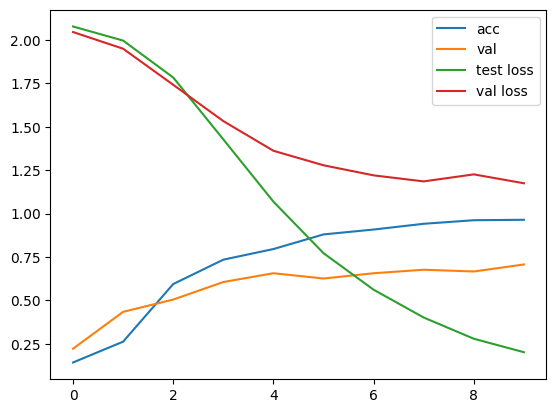

In [34]:
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label ='val')
plt.plot(history.history['loss'], label = 'test loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
print(f"max accuracy was {max(history.history['val_accuracy'])}")
plt.show()

In [35]:
model2 =Sequential ([
   Embedding(input_dim  =len(word_index)+1,
            output_dim=16),#
   Flatten(),
  Dense(32, activation= 'relu') ,
   Dense(len(labels_encoded[0]), activation = 'softmax')#output layer
])


model2.compile (loss = 'categorical_crossentropy',
               optimizer = Adam(learning_rate = 0.001),
               metrics = ['accuracy'])

history = model2.fit (train_padded,y_train,
                     epochs =10,
                     validation_data = (test_padded,y_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.1959 - loss: 2.0758 - val_accuracy: 0.3636 - val_loss: 2.0558
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5206 - loss: 2.0354 - val_accuracy: 0.4545 - val_loss: 2.0220
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6701 - loss: 1.9746 - val_accuracy: 0.4848 - val_loss: 1.9699
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6918 - loss: 1.8931 - val_accuracy: 0.4646 - val_loss: 1.8900
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6494 - loss: 1.7751 - val_accuracy: 0.4747 - val_loss: 1.7866
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6664 - loss: 1.6087 - val_accuracy: 0.5051 - val_loss: 1.6630
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7417 - loss: 1.4203 - val_accuracy: 0.5051 - val_loss: 1.5309
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7887 - loss: 1.2099 - val_accuracy: 0.5859 - v

In [ ]:
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label ='val')
plt.plot(history.history['loss'], label = 'test loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
print(f"max accuracy was {max(history.history['val_accuracy'])}")
plt.show()

In [ ]:
model.summary()

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# # DounLoad
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
##

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
##
# define
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# יצירת פונקצייה לניקוי
def clean_text(text):
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]  # lemm&stop words cleaning
    return " ".join(words)  # החזרת טקסט מעובד

# החלת הפונקציה על כל הדאטה
X_train_cleaned = [clean_text(text) for text in X_train]
X_test_cleaned = [clean_text(text) for text in X_test]

In [14]:
X_train[42]

'"The magical world feels alive and vibrant."'

In [13]:
X_train_cleaned [42]

"`` magical world feel alive vibrant . ''"

In [15]:
#Tokenization like before
#training set
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_cleaned)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train_cleaned)
train_padded = pad_sequences(train_sequences, padding='pre')

max_len = train_padded.shape[1]

#testing set
test_sequences = tokenizer.texts_to_sequences(X_test_cleaned)
test_padded = pad_sequences(test_sequences, padding='pre', maxlen=max_len,truncating = 'post')

In [19]:
list(word_index.keys())[:10]

['<OOV>',
 "''",
 "'s",
 'character',
 'magical',
 'film',
 'world',
 'add',
 'neville',
 'longbottom']

In [20]:
model = Sequential([
    Embedding(input_dim=len(word_index)+1,

              output_dim=12),
    tf.keras.layers.SimpleRNN(16),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(labels_encoded[0]), activation='softmax')])

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.005),
              metrics=['accuracy'])

history = model.fit(train_padded, y_train,
                    epochs=20,
                    validation_data=(test_padded, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 399ms/step - accuracy: 0.1627 - loss: 2.0730 - val_accuracy: 0.2020 - val_loss: 2.0150
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2510 - loss: 1.8574 - val_accuracy: 0.3636 - val_loss: 1.6918
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4653 - loss: 1.4590 - val_accuracy: 0.3838 - val_loss: 1.5613
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6705 - loss: 1.1375 - val_accuracy: 0.3838 - val_loss: 1.5382
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6666 - loss: 1.0611 - val_accuracy: 0.4040 - val_loss: 1.5419
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7423 - loss: 0.8190 - val_accuracy: 0.4242 - val_loss: 1.6810
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8154 - loss: 0.6429 - val_accuracy: 0.5051 - val_loss: 1.4269
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8357 - loss: 0.5440 - val_accuracy: 0.5455 - val